In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 20)

In [2]:
def gs_crit_full(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc) + np.abs(df.best_train_auc-df.best_test_auc) + \
              np.abs(df.best_train_auc-df.best_test_intra_auc)
    best_perf = 1-df.best_train_auc + 1-df.best_val_auc + 1-df.best_test_intra_auc + \
                1-df.best_test_auc
    
    return overfit + 2*best_perf

def gs_crit_best(df):
    overfit = np.abs(df.best_train_auc-df.best_val_auc)
    best_perf = 1-df.best_val_auc
    
    return overfit + 2*best_perf

def gs_crit_final(df):
    overfit = np.abs(df.train_auc-df.val_auc)
    final_perf = 1-df.val_auc
    
    return overfit + 2*final_perf


def preprocess_bdd(bdd):
    bdd['best_crit'] = gs_crit_best(bdd)
    bdd['final_crit'] = gs_crit_final(bdd)
    bdd['min_best_perf'] = bdd[['best_train_auc', 'best_val_auc', 'best_test_intra_auc', 'best_test_auc']].apply(min, axis=1)
    bdd['min_final_perf'] = bdd[['train_auc', 'val_auc', 'test_intra_auc', 'test_auc']].apply(min, axis=1)
    bdd['min_best_intra'] = bdd[['best_train_auc', 'best_val_auc', 'best_test_intra_auc']].apply(min, axis=1)

    # sort by criterion
    bdd.sort_values(by='best_crit', inplace=True)


def plot_hists(df):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    sns.histplot(df, x='min_best_perf')
    plt.subplot(1,2,2)
    sns.histplot(df, x='min_final_perf')
    plt.show()

# S.or.

In [3]:
bdd_sor = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/S.or./bdd_Sor_both.csv", index_col=0)

preprocess_bdd(bdd_sor)

bdd_sor

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
57,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.549135,0.572973,0.399049,0.516010,0.587839,0.638669,0.442314,0.493842,0.376694,0.008864,7,0.072928,1.353525,0.773492,0.877892,0.442314,0.399049,0.493842
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.719014,0.429522,0.409695,0.596675,0.595963,0.616216,0.446391,0.540025,0.049424,0.021320,2,0.084810,1.296436,0.787821,1.430449,0.446391,0.409695,0.540025
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.428137,0.377547,0.557913,0.433190,0.592253,0.612058,0.455301,0.575123,0.187572,0.052213,1,0.258847,1.352152,0.795689,1.295496,0.455301,0.377547,0.575123
42,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.559445,0.644491,0.470855,0.491379,0.220095,0.318655,4,0.117043,1624.265869,0.796064,1.000000,0.470855,0.500000,0.491379
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.544938,0.552183,0.479236,0.494458,0.600027,0.601663,0.432045,0.577278,0.171240,0.044248,5,0.102017,1.357341,0.798310,0.902879,0.432045,0.479236,0.577278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.567649,0.535967,0.442540,0.527094,0.165853,0.349228,5,0.189955,12374.054688,0.959749,1.000000,0.442540,0.500000,0.527094
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.854677,0.444075,0.534582,0.590517,0.610851,0.549272,0.470100,0.511392,0.171800,0.000428,5,0.109374,1.177171,0.963034,1.522452,0.470100,0.444075,0.511392
51,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.577932,0.528482,0.447901,0.524631,0.184935,0.432535,6,0.117346,814.384949,0.992485,1.000000,0.447901,0.500000,0.524631
16,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.770177,0.542204,0.479764,0.493842,0.716051,0.570894,0.426306,0.544335,0.027130,0.005388,3,0.110390,1.232441,1.003369,1.143566,0.426306,0.479764,0.544335


In [4]:
print(bdd_sor[bdd_sor.min_best_perf >= 0.5].shape[0])
bdd_sor[bdd_sor.min_best_perf >= 0.5]

5


,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
59,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.577689,0.557173,0.484597,0.539717,0.573310,0.605405,0.505738,0.540948,0.047665,0.640966,3,0.061225,1.357648,0.821285,0.906171,0.505738,0.484597,0.540948
30,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.451216,0.523493,0.518121,0.470443,0.539439,0.604158,0.560254,0.536022,0.035590,0.085306,1,0.036188,1.941209,0.856403,1.025291,0.536022,0.451216,0.536022
40,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.581048,0.518087,0.461492,0.502001,0.557051,0.556757,0.504228,0.616687,0.154609,0.001727,8,0.175016,1.334081,0.886781,1.026786,0.504228,0.461492,0.556757
28,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.637555,0.523909,0.461190,0.558190,0.605378,0.557588,0.500151,0.519397,0.218135,0.001597,5,0.151247,1.335749,0.932613,1.065829,0.500151,0.461190,0.519397
58,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.614237,0.488565,0.444428,0.454280,0.550616,0.538046,0.517970,0.511084,0.071475,0.004042,9,0.155039,1.328974,0.936479,1.148541,0.511084,0.444428,0.511084


In [5]:
print(bdd_sor[bdd_sor.min_best_intra >= 0.55].shape[0])
bdd_sor[bdd_sor.min_best_intra >= 0.55]

7


,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.428137,0.377547,0.557913,0.433190,0.592253,0.612058,0.455301,0.575123,0.187572,0.052213,1,0.258847,1.352152,0.795689,1.295496,0.455301,0.377547,0.575123
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.544938,0.552183,0.479236,0.494458,0.600027,0.601663,0.432045,0.577278,0.171240,0.044248,5,0.102017,1.357341,0.798310,0.902879,0.432045,0.479236,0.577278
36,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.579160,0.604990,0.446542,0.553264,0.358928,0.496460,3,0.008309,1440.647949,0.815850,1.000000,0.446542,0.500000,0.553264
47,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.527983,0.480665,0.484144,0.507543,0.578702,0.602079,0.437330,0.565271,0.395445,0.076689,3,0.187084,5.195068,0.819219,1.085987,0.437330,0.480665,0.565271
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.556713,0.610603,0.461870,0.574046,0.567682,0.602079,0.467834,0.558805,0.198094,0.046071,5,0.079883,1.621132,0.830239,0.832685,0.467834,0.461870,0.558805
40,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.581048,0.518087,0.461492,0.502001,0.557051,0.556757,0.504228,0.616687,0.154609,0.001727,8,0.175016,1.334081,0.886781,1.026786,0.504228,0.461492,0.556757
35,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.904493,0.498545,0.506342,0.667796,0.857813,0.633680,0.480973,0.624384,0.010431,0.003729,3,0.007851,1.079954,0.956773,1.408859,0.480973,0.498545,0.624384


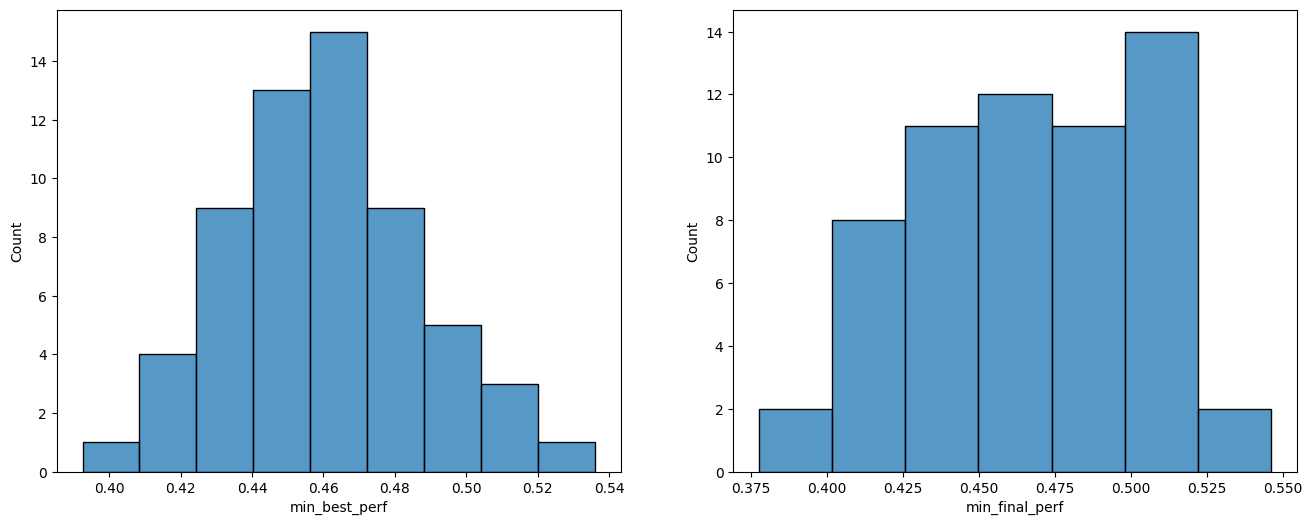

In [6]:
plot_hists(bdd_sor)

# S.T.s.

In [7]:
bdd_sts = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/S.T.s./bdd_STs_both.csv", index_col=0)

preprocess_bdd(bdd_sts)

bdd_sts

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
20,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.599778,0.610395,0.588946,0.562808,0.582046,0.620374,0.590607,0.542796,0.027290,0.008931,4,0.384765,1.359767,0.797580,0.789827,0.542796,0.562808,0.542796
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.484228,0.566736,0.591664,0.386084,0.503442,0.691892,0.528541,0.436884,0.105995,0.052343,2,0.469222,1.346144,0.804666,0.949036,0.436884,0.386084,0.436884
36,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.721927,0.488150,0.565690,0.573892,0.553910,0.634096,0.583056,0.520012,0.006943,0.002164,2,0.310960,1.246541,0.811994,1.257478,0.520012,0.488150,0.520012
11,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.756400,0.537214,0.525974,0.718904,0.609911,0.598753,0.579432,0.582512,0.036740,0.000459,5,0.062965,1.231797,0.813653,1.144757,0.579432,0.525974,0.582512
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.719751,0.515593,0.542585,0.744766,0.617458,0.599168,0.582301,0.668719,0.164393,0.000475,5,0.031012,1.258531,0.819953,1.172974,0.582301,0.515593,0.599168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.517567,0.414553,0.462474,0.611761,0.529697,0.514345,0.557611,0.516780,0.133865,0.698857,1,0.371077,17.803629,0.986662,1.273908,0.514345,0.414553,0.514345
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.037564,0.916692,8,0.239504,989538.500000,1.000000,1.000000,0.500000,0.500000,0.500000
28,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.558781,0.523493,0.549683,0.502001,0.554467,0.516424,0.544246,0.494150,0.133058,0.183563,0,0.276023,451.269043,1.005194,0.988302,0.494150,0.502001,0.494150
6,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.724171,0.521830,0.504077,0.728140,0.713138,0.528067,0.507098,0.713978,0.109223,0.000318,5,0.473691,1.278136,1.128939,1.158682,0.507098,0.504077,0.528067


In [8]:
print(bdd_sts[bdd_sts.min_best_perf >= 0.5].shape[0])
bdd_sts[bdd_sts.min_best_perf >= 0.5]

37


,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
20,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.599778,0.610395,0.588946,0.562808,0.582046,0.620374,0.590607,0.542796,0.027290,0.008931,4,0.384765,1.359767,0.797580,0.789827,0.542796,0.562808,0.542796
36,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.721927,0.488150,0.565690,0.573892,0.553910,0.634096,0.583056,0.520012,0.006943,0.002164,2,0.310960,1.246541,0.811994,1.257478,0.520012,0.488150,0.520012
11,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.756400,0.537214,0.525974,0.718904,0.609911,0.598753,0.579432,0.582512,0.036740,0.000459,5,0.062965,1.231797,0.813653,1.144757,0.579432,0.525974,0.582512
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.719751,0.515593,0.542585,0.744766,0.617458,0.599168,0.582301,0.668719,0.164393,0.000475,5,0.031012,1.258531,0.819953,1.172974,0.582301,0.515593,0.599168
22,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.849605,0.518503,0.531108,0.654557,0.641476,0.606237,0.542736,0.702278,0.005153,0.002315,4,0.023665,0.996867,0.822765,1.294096,0.542736,0.518503,0.606237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.992891,0.472765,0.546814,0.696121,0.682077,0.576299,0.528994,0.766933,0.131382,0.000258,1,0.167687,0.885866,0.953179,1.574596,0.528994,0.472765,0.576299
55,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.554236,0.437214,0.541906,0.488916,0.547503,0.530561,0.573392,0.521552,0.179736,0.214923,0,0.333106,5.650955,0.955819,1.242593,0.521552,0.437214,0.521552
35,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.517567,0.414553,0.462474,0.611761,0.529697,0.514345,0.557611,0.516780,0.133865,0.698857,1,0.371077,17.803629,0.986662,1.273908,0.514345,0.414553,0.514345
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.037564,0.916692,8,0.239504,989538.500000,1.000000,1.000000,0.500000,0.500000,0.500000


In [9]:
print(bdd_sts[bdd_sts.min_best_intra >= 0.55].shape[0])
bdd_sts[bdd_sts.min_best_intra >= 0.55]

13


,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
11,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.756400,0.537214,0.525974,0.718904,0.609911,0.598753,0.579432,0.582512,0.036740,0.000459,5,0.062965,1.231797,0.813653,1.144757,0.579432,0.525974,0.582512
7,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.719751,0.515593,0.542585,0.744766,0.617458,0.599168,0.582301,0.668719,0.164393,0.000475,5,0.031012,1.258531,0.819953,1.172974,0.582301,0.515593,0.599168
22,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.849605,0.518503,0.531108,0.654557,0.641476,0.606237,0.542736,0.702278,0.005153,0.002315,4,0.023665,0.996867,0.822765,1.294096,0.542736,0.518503,0.606237
47,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.645805,0.518919,0.533525,0.762315,0.585041,0.587526,0.493506,0.701355,0.160540,0.007255,2,0.363501,1.296191,0.827433,1.089048,0.493506,0.518919,0.585041
37,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.566634,0.511435,0.553760,0.588054,0.550280,0.611642,0.590003,0.555727,0.141279,0.027113,2,0.048906,1.347586,0.838077,1.032331,0.550280,0.511435,0.550280
18,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.913106,0.501871,0.511477,0.521552,0.576105,0.583784,0.578979,0.579126,0.026228,0.002995,1,0.421370,1.060900,0.840111,1.407493,0.576105,0.501871,0.576105
9,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.694704,0.491060,0.531410,0.756158,0.565667,0.590437,0.526125,0.596983,0.013489,0.006996,5,0.456686,1.287550,0.843897,1.221523,0.526125,0.491060,0.565667
39,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.610821,0.511850,0.582301,0.701663,0.554116,0.589189,0.586228,0.596983,0.192482,0.004856,0,0.029177,1.344788,0.856695,1.075270,0.554116,0.511850,0.554116
40,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.486406,0.368399,0.424645,0.500000,0.558041,0.577963,0.581546,0.554187,0.088530,0.188025,0,0.225212,1.360515,0.863996,1.381208,0.554187,0.368399,0.554187
10,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.613891,0.546778,0.483540,0.642857,0.652167,0.594595,0.471761,0.658251,0.010350,0.002817,4,0.012746,1.344729,0.868383,0.973559,0.471761,0.483540,0.594595


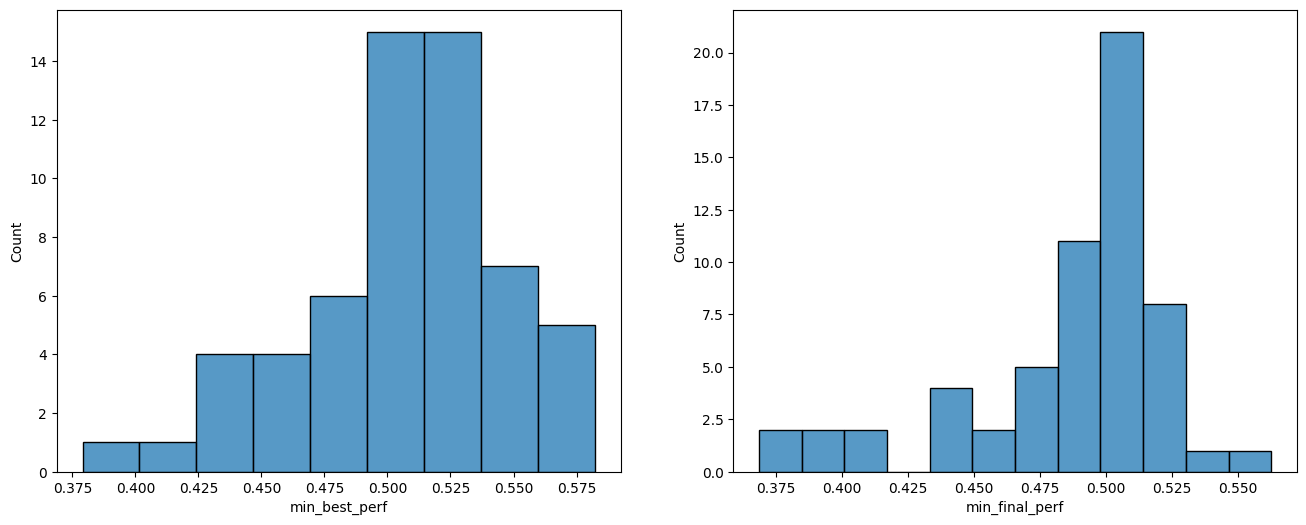

In [10]:
plot_hists(bdd_sts)

# pericalcarine

In [11]:
bdd_pc = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/pericalcarine/bdd_pericalcarine.csv", index_col=0)

preprocess_bdd(bdd_pc)

bdd_pc

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,drop_rate,lr,max_angle,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
32,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.759252,0.661954,0.576865,0.570505,0.672760,0.706445,0.625944,0.587746,0.014459,0.010428,6,0.030534,1.246508,0.620795,0.773390,0.587746,0.570505,0.587746
40,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.933667,0.617879,0.502416,0.534791,0.656666,0.679002,0.541830,0.613300,0.013973,0.007874,7,0.022812,0.999020,0.664331,1.080028,0.541830,0.502416,0.613300
21,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.755863,0.593763,0.541679,0.619458,0.654365,0.676923,0.517668,0.623768,0.011706,0.000854,10,0.020178,1.251947,0.668712,0.974574,0.517668,0.541679,0.623768
45,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.872083,0.607069,0.511930,0.603756,0.671602,0.666528,0.523558,0.610530,0.085090,0.000455,9,0.039160,1.111929,0.672017,1.050878,0.523558,0.511930,0.610530
19,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.997258,0.534304,0.536545,0.504310,0.753938,0.693971,0.526125,0.661946,0.029457,0.000215,5,0.017751,0.832641,0.672025,1.394347,0.526125,0.504310,0.661946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.508325,0.552183,0.552401,0.666102,0.538032,0.571726,0.528617,0.611299,0.282793,0.001123,8,0.054250,1.352268,0.890242,0.939492,0.528617,0.508325,0.538032
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.817213,0.577963,0.550287,0.546182,0.744247,0.615800,0.546210,0.548337,0.023239,0.011427,5,0.020040,1.224451,0.896846,1.083326,0.546210,0.546182,0.548337
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.508317,0.493971,0.536998,0.510468,0.534495,0.563410,0.487919,0.543103,0.330487,0.006950,1,0.362806,1.343245,0.902095,1.026405,0.487919,0.493971,0.534495
14,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.947063,0.609563,0.472516,0.574200,0.872036,0.647401,0.491694,0.521860,0.034095,0.001115,6,0.065049,0.986925,0.929832,1.118372,0.491694,0.472516,0.521860


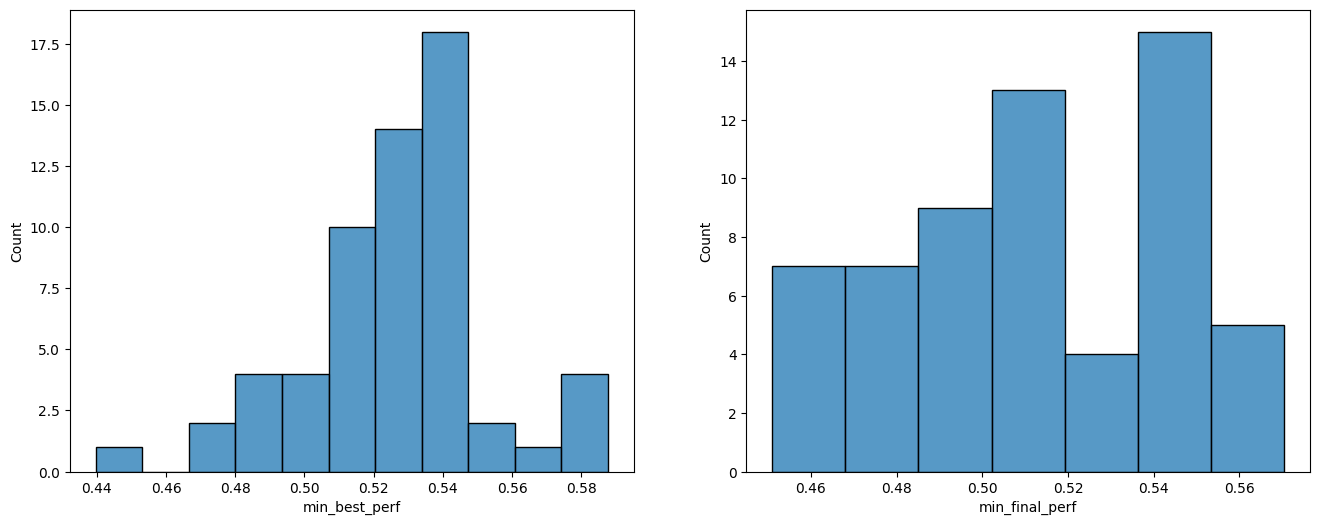

In [12]:
plot_hists(bdd_pc)

# CINGULATE

In [13]:
bdd_cing = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step1/3gs_cing_schiz/bdd_cing_schiz.csv", index_col=0)

preprocess_bdd(bdd_cing)

bdd_cing

,model_path,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,...,lr,max_angle,projection_head_name,sigma_noise,train_loss,best_crit,final_crit,min_best_perf,min_final_perf,min_best_intra
102,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.745548,0.545530,0.550362,0.577894,0.674660,0.715593,0.486107,0.594212,10,...,0.003490,0,sigmoid,0.489826,1.257564,0.609748,1.108958,0.486107,0.545530,0.594212
41,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.918621,0.640333,0.538584,0.572198,0.823550,0.734304,0.517215,0.526478,10,...,0.002421,1,sigmoid,0.439408,1.000475,0.620640,0.997623,0.517215,0.538584,0.526478
10,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.614002,0.570062,0.558140,0.631773,0.680099,0.675676,0.528994,0.589901,4,...,0.000590,4,linear,0.242170,1.336614,0.653072,0.903815,0.528994,0.558140,0.589901
56,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.779131,0.570894,0.562368,0.566195,0.645792,0.681913,0.601782,0.602833,10,...,0.000561,1,relu,0.365355,1.213579,0.672295,1.066449,0.601782,0.562368,0.602833
31,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.955977,0.516008,0.503775,0.531712,0.645221,0.664865,0.538206,0.524323,10,...,0.000659,5,linear,0.297135,0.873270,0.689914,1.407952,0.524323,0.503775,0.524323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,10,...,0.054378,4,sigmoid,0.310130,1.377125,1.000000,1.000000,0.500000,0.500000,0.500000
62,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.500000,0.500000,0.500000,0.500000,0.589578,0.517048,0.626321,0.564347,32,...,0.033255,5,relu,0.079131,1.342983,1.038435,1.000000,0.517048,0.500000,0.517048
60,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.998752,0.516008,0.537753,0.596983,0.870477,0.604990,0.514648,0.539409,32,...,0.000360,2,linear,0.211261,0.656712,1.055508,1.450727,0.514648,0.516008,0.539409
37,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0.996571,0.557588,0.543944,0.586823,0.963351,0.622869,0.565237,0.631158,32,...,0.000344,6,linear,0.175372,0.609372,1.094744,1.323806,0.565237,0.543944,0.622869


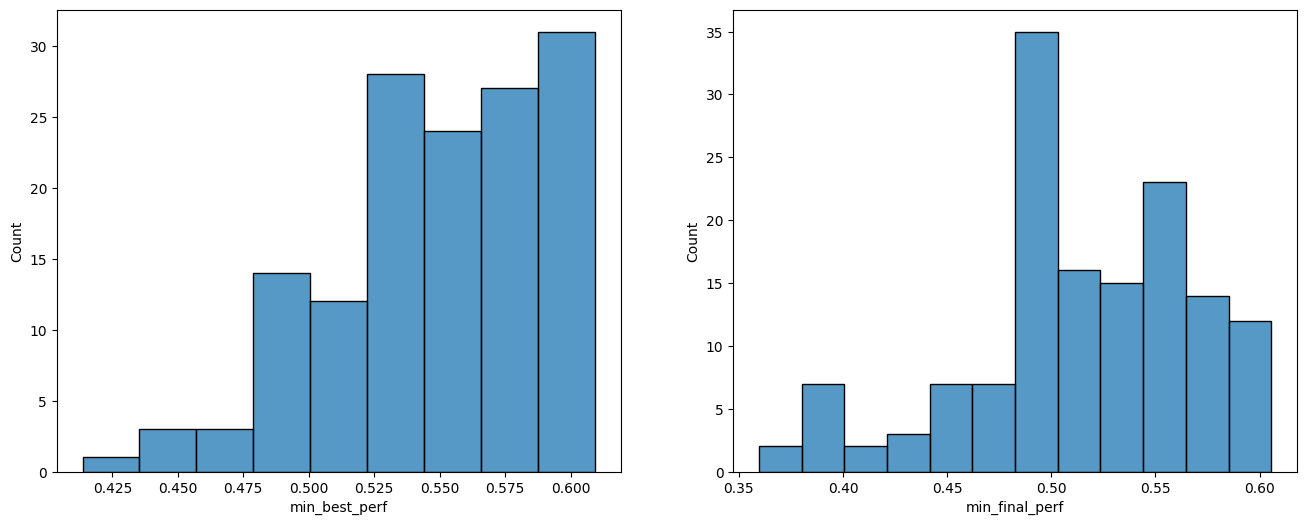

In [14]:
plot_hists(bdd_cing)

In [15]:
bdd_cing.min_best_perf.max()

0.6092980295566502